# The Interdependencies between FDI, Government Debt, Expenditure and GDP    - A Comprehensive Analysis 

### Project Proposal: 

This project aims to delve into the intricate relationships between Foreign Direct Investment (FDI), government debt, and Gross Domestic Product (GDP) using a detailed empirical analysis. By employing sophisticated statistical techniques such as stationarity testing, cointegration analysis, and time series modeling, the study will uncover the underlying dynamics and long-term trends among these key economic indicators. The analysis will also include inflation adjustments to provide more accurate insights. Through comprehensive data exploration, advanced modeling, and collaborative efforts, the project seeks to inform economic policy and decision-making by highlighting how FDI and government debt impact GDP growth.

In [1]:
""" 
Group1: Vaishali Senthil, Raj Peswani, Subasri Govindan, Vandana Mathi, Aditya Bhat, Saivenkata Nagavyjayanthi Polapragada
"""

' \nGroup1: Vaishali Senthil, Raj Peswani, Subasri Govindan, Vandana Mathi, Aditya Bhat, Saivenkata Nagavyjayanthi Polapragada\n'

## Data Preparation

In [2]:
#Import required libraries 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
# Load the dataset 
df = pd.read_csv("FDI_Dataset.csv")

In [4]:
#Check for any missing values in the given data and drop/change if required
df.isna().sum()

year                                  0
govt debt                             0
revenue expenditure                   0
capital expenditure                   0
FDI                                   0
total expenditure                     0
agriculture expenditure              22
rural development expenditure        22
energy expenditure                   22
industry and minerals expenditure    22
transport expenditure                22
internal debt                        10
exchange rate                         0
govt debt in % of GDP                 0
FDI in % of GDP                       0
GDP                                   0
dtype: int64

In [5]:
#Check for outliers and drop/change if needed
#Using zscore for each column
z_scores=stats.zscore(df)
outliers=(z_scores>3).any(axis=1)
outlier_data=df[outliers]
zscore_outlier=z_scores[outliers]
#Check the columns with their zscores
outlier_columns= pd.concat([outlier_data, zscore_outlier.add_suffix('_zscore')], axis=1)

In [6]:
#Check the z_score for outliers
zscore_outlier

,year,govt debt,revenue expenditure,capital expenditure,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,exchange rate,govt debt in % of GDP,FDI in % of GDP,GDP
38,0.737852,0.386075,0.375862,-0.169805,1.530735,0.453015,NaN,NaN,NaN,NaN,NaN,NaN,0.368734,1.097823,3.193617,0.270751
52,1.636106,2.636248,2.781701,3.181732,1.871102,2.587441,NaN,NaN,NaN,NaN,NaN,NaN,1.990188,0.882394,0.737419,2.462172
53,1.700267,3.078205,2.826627,4.715851,2.147760,2.826139,NaN,NaN,NaN,NaN,NaN,NaN,2.015470,1.075345,0.758268,2.775091


In [7]:
#Check the outlier data and drop/change if needed
outlier_data

,year,govt debt,revenue expenditure,capital expenditure,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,exchange rate,govt debt in % of GDP,FDI in % of GDP,GDP
38,2008,687.506571,140.321372,15.937423,43.446279,203.162,6.78,15.282,34.101,8.973,29.271,464.225,43.51,57.292214,3.620523,1200.0
52,2022,1896.390000,415.091684,87.396376,49.989286,514.718,NaN,NaN,NaN,NaN,NaN,1628.429,81.35,55.450000,1.461675,3420.0
53,2023,2133.827000,420.222702,120.105711,55.307600,549.560,NaN,NaN,NaN,NaN,NaN,1814.806,81.94,57.100000,1.480000,3737.0


In [8]:
#Derived variables
#Calculate yearly growth rates for revenue, capital and total expenditure
rev_growth=df['revenue expenditure'].pct_change(periods=1)
cap_growth=df['capital expenditure'].pct_change(periods=1)
tot_growth=df['total expenditure'].pct_change(periods=1)

In [9]:
#insert these values into the dataframe
df.insert(loc=2,column='revenue_exp %growth',value=rev_growth*100)
df.insert(loc=4,column='capital_exp %growth',value=cap_growth*100)
df.insert(loc=6,column='total_exp %growth',value=tot_growth*100)

In [10]:
#Check the modified dataset
df.head(5)

,year,govt debt,revenue_exp %growth,revenue expenditure,capital_exp %growth,capital expenditure,total_exp %growth,FDI,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,exchange rate,govt debt in % of GDP,FDI in % of GDP,GDP
0,1970,23.834143,NaN,3.735084,NaN,3.489260,NaN,0.045458,7.499,NaN,NaN,NaN,NaN,NaN,NaN,7.50,38.183503,0.072826,62.42
1,1971,25.312157,18.566864,4.428571,-20.227153,2.783482,22.709695,0.047659,9.202,NaN,NaN,NaN,NaN,NaN,NaN,7.49,37.583009,0.070763,67.35
2,1972,26.552412,17.243670,5.192220,36.429215,3.797483,12.497283,0.017789,10.352,NaN,NaN,NaN,NaN,NaN,NaN,7.59,37.157028,0.024894,71.46
3,1973,29.187406,12.335825,5.832723,10.638162,4.201465,2.569552,0.037912,10.618,NaN,NaN,NaN,NaN,NaN,NaN,7.74,34.129334,0.044331,85.52
4,1974,28.632653,19.717326,6.982780,24.685607,5.238622,15.530232,0.056972,12.267,NaN,NaN,NaN,NaN,NaN,NaN,8.10,28.767862,0.057241,99.53


In [11]:
#Calculate internal debt in % of GDP
df.insert(loc=16,column='internal debt in % of GDP',value=(df['internal debt']/df['GDP'])*100)

In [12]:
#Round each column(which has floats) to 3 decimal places 
df= df.round(3)

In [13]:
#save the new dataset 
df.to_csv('FDI_DataSet_Modified.csv',index=False)

## EDA - Exploratory Data Analysis

In [14]:
#declare columns used for EDA 
columns = ['revenue expenditure', 'capital expenditure',
       'total expenditure', 'agriculture expenditure',
       'rural development expenditure', 'energy expenditure',
       'industry and minerals expenditure', 'transport expenditure',
       'internal debt', 'GDP'
       , 'FDI', 'govt debt']

### 1.Descriptive statistics

In [15]:
#describe all except year column

df_key_variables = df[columns]
df_key_variables.describe()

,revenue expenditure,capital expenditure,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,GDP,FDI,govt debt
count,54.000000,54.000000,54.000000,32.000000,32.000000,32.000000,32.000000,32.000000,44.000000,54.000000,54.000000,54.000000
mean,97.394241,19.557889,137.036704,2.945750,5.320344,15.945156,4.446125,12.093594,440.076727,925.717593,14.020296,480.091556
std,115.282229,21.521498,147.337718,2.101976,4.660242,10.611203,2.606142,10.213183,482.546043,1022.553756,19.403956,542.284849
min,3.735000,2.783000,7.499000,1.607000,0.216000,4.864000,1.585000,3.585000,39.267000,62.420000,0.006000,23.834000
25%,16.254250,8.205750,35.988500,1.758750,3.006250,8.960500,2.308750,5.075500,81.696500,213.500000,0.075250,85.353500
50%,35.388500,10.674500,62.039500,2.109000,3.317000,10.266000,3.826500,6.316500,201.730500,404.500000,2.298000,194.606500
75%,160.526500,24.425750,249.275500,3.142250,6.770750,26.144000,6.470500,18.710250,715.747500,1595.000000,28.019500,835.167000
max,420.223000,120.106000,549.560000,10.067000,17.590000,42.589000,11.326000,36.505000,1814.806000,3737.000000,64.324000,2133.827000


#### Key Inferences:

1. The mean and standard deviation values indicate significant variability in revenue and capital expenditures.
2. Internal debt and government debt show substantial ranges, with internal debt ranging from 39.26 to 1814.80 and government debt ranging from 23.83 to 2133.83.

### 2. Time Series Plots

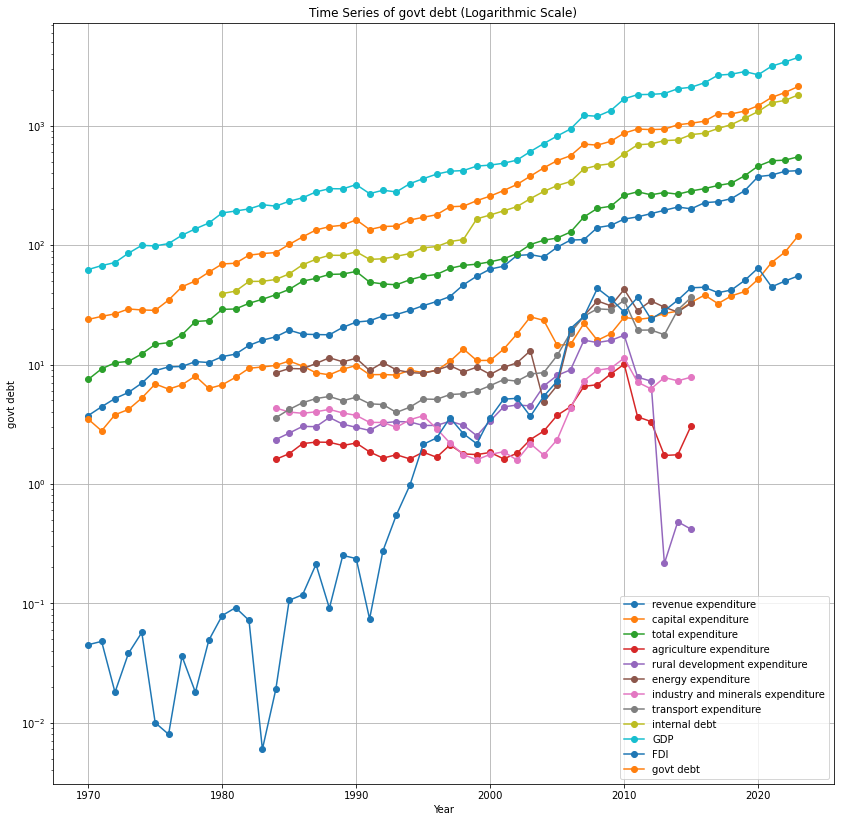

In [17]:
plt.figure(figsize=(14, 14))

# Plot time series for each key variable in logarithmic scale
for column in df_key_variables.columns:
    plt.semilogy(df['year'], df[column], marker='o')
    plt.title(f'Time Series of {column} (Logarithmic Scale)')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
plt.legend(df_key_variables.columns)
plt.show()

#### Key Inferences

1. The time series plot shows an exponential increase in government debt from 1970 to 2022.
2. Key periods of growth in government debt are observed around the early 1990s and post-2000s, with a significant rise around 2020.
3. This increase is consistent across various expenditure categories, indicating an overall rise in government spending.

### 3. Correlation Analysis and Heatmap

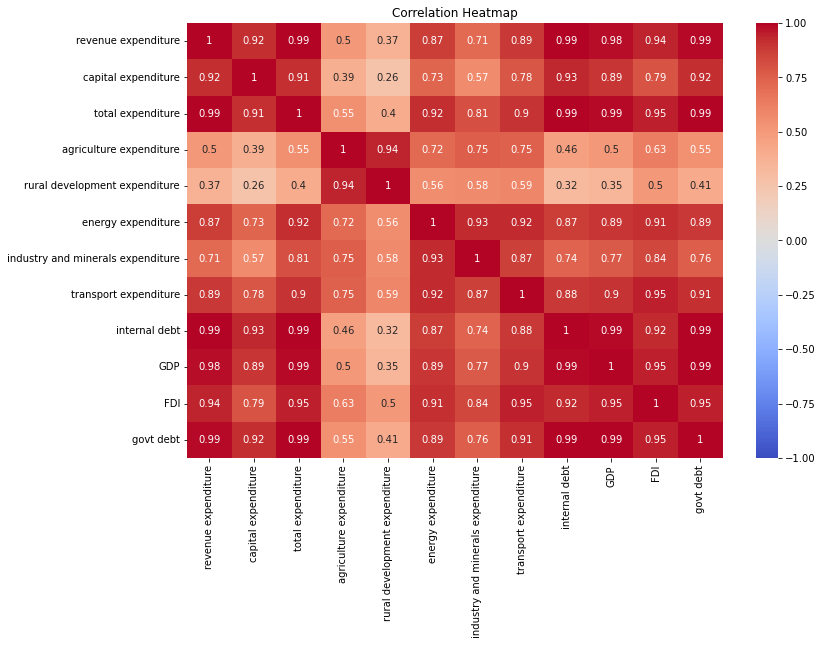

In [19]:
#Import required library
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_key_variables.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Key Inferences:

1. There is a very high correlation (close to 1) between various types of expenditures and government debt, indicating that as expenditure increases, government debt also increases.
2. Revenue expenditure, capital expenditure, total expenditure, and internal debt have the highest correlations with government debt.
3. GDP and FDI also show high correlations with government debt, indicating that as the economy grows, so does the debt.

### 4. Composition of government expenditure over time

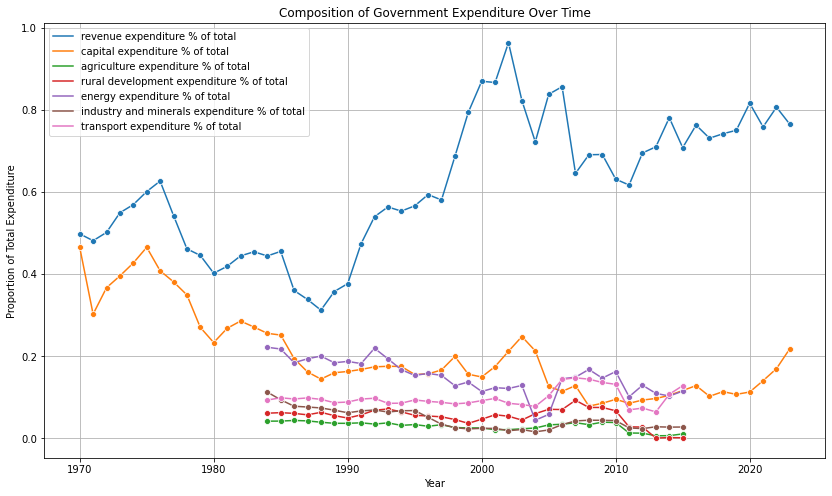

In [20]:
# Calculate the proportion of each expenditure type over total expenditure
expenditure_columns = ['revenue expenditure', 'capital expenditure', 'agriculture expenditure', 
                       'rural development expenditure', 'energy expenditure', 
                       'industry and minerals expenditure', 'transport expenditure']

# Normalize expenditure columns by total expenditure
for column in expenditure_columns:
    df[f'{column} % of total'] = df[column] / df['total expenditure']

# Plot the composition over time
df_plot = df.melt(id_vars=['year'], value_vars=[f'{col} % of total' for col in expenditure_columns],
                  var_name='Expenditure Type', value_name='Proportion')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot, x='year', y='Proportion', hue='Expenditure Type', marker='o')
plt.title('Composition of Government Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Total Expenditure')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Key inferences:

1. The composition plot reveals that revenue expenditure constitutes the largest proportion of total government expenditure throughout the years.
2. Capital expenditure shows a fluctuating but generally increasing trend.
3. Other expenditures such as agriculture, rural development, energy, industry and minerals, and transport expenditures remain relatively lower but stable over the years.

### 5. Trends in FDI, Government debt, and GDP

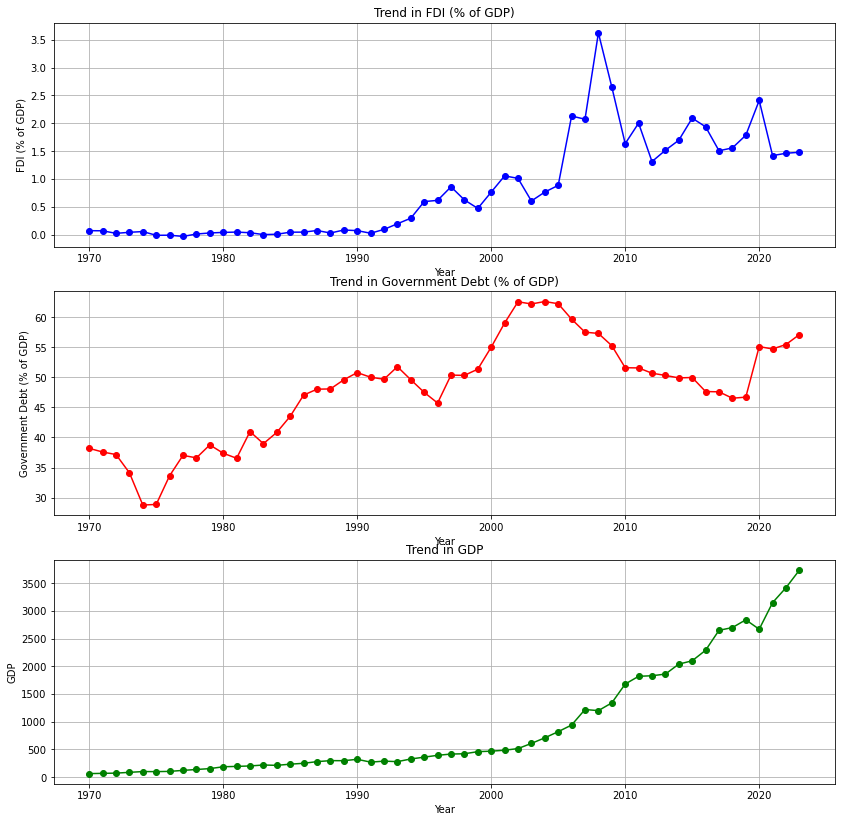

In [21]:
# Plot trends for FDI, Government debt, and GDP
plt.figure(figsize=(14, 14))

# FDI trend
plt.subplot(3, 1, 1)
plt.plot(df['year'], df['FDI in % of GDP'], marker='o', color='blue')
plt.title('Trend in FDI (% of GDP)')
plt.xlabel('Year')
plt.ylabel('FDI (% of GDP)')
plt.grid(True)

# Government debt trend
plt.subplot(3, 1, 2)
plt.plot(df['year'], df['govt debt in % of GDP'], marker='o', color='red')
plt.title('Trend in Government Debt (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Government Debt (% of GDP)')
plt.grid(True)

# GDP trend
plt.subplot(3, 1, 3)
plt.plot(df['year'], df['GDP'], marker='o', color='green')
plt.title('Trend in GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)

#### Key Inferences:

1. FDI (% of GDP) shows fluctuations, with notable peaks around 2010 and 2020.
2. Government debt as a percentage of GDP increased significantly during the 1980s and 2000s, with a peak around 2020.
3. DP shows a continuous increase over the years, highlighting economic growth.

#### Overall Summary from the EDA: 

The analysis demonstrates a consistent increase in government debt over the past decades, driven largely by increases in various government expenditures. High correlations between different types of expenditures and government debt suggest that managing expenditures could be key to controlling debt levels. The significant increase in GDP and fluctuating FDI trends reflect broader economic dynamics. This analysis provides a comprehensive overview of the government's fiscal health and spending patterns, highlighting the need for sustainable expenditure management to ensure long-term economic stability.

## Stationarity Test

#### Perform Augmented Dickey-Fuller (ADF) test

* Null hypothesis: The time series has a unit root (it is non-stationary).
* Alternate hypothesis: The time series does not have a unit root (it is stationary).

In [22]:
#import required libraries
from statsmodels.tsa.stattools import adfuller

# Define the required columns to test for stationarity
columns_to_test = ['revenue expenditure', 'capital expenditure', 'total expenditure', 'agriculture expenditure', 
                   'rural development expenditure', 'energy expenditure', 'industry and minerals expenditure', 
                   'transport expenditure', 'internal debt', 'govt debt', 'FDI', 'GDP']

# Clean the data by removing rows with missing or infinite values
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

# Lists to store the names of stationary and non-stationary variables
stationary_columns = []
non_stationary_columns = []

# Perform the ADF test for each column
for col in columns_to_test:
    series = df_clean[col]
    result = adfuller(series)
    print(f"ADF Test for {col}:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print(f"{col} is likely non-stationary.")
        non_stationary_columns.append(col)
    else:
        print(f"{col} is likely stationary.")
        stationary_columns.append(col)
    print()

# Print the lists of stationary and non-stationary variables
print("\nStationary Variables:")
for col in stationary_columns:
    print(col)

print("\nNon-Stationary Variables:")
for col in non_stationary_columns:
    print(col)

ADF Test for revenue expenditure:
Test Statistic: -0.5102906694932114
p-value: 0.8899926487874781
revenue expenditure is likely non-stationary.

ADF Test for capital expenditure:
Test Statistic: 0.9119704582658067
p-value: 0.9932445723756388
capital expenditure is likely non-stationary.

ADF Test for total expenditure:
Test Statistic: 1.3598638385869224
p-value: 0.9969239590899521
total expenditure is likely non-stationary.

ADF Test for agriculture expenditure:
Test Statistic: -1.9243539345755996
p-value: 0.3206923970743195
agriculture expenditure is likely non-stationary.

ADF Test for rural development expenditure:
Test Statistic: -2.036524491717998
p-value: 0.27079147300860185
rural development expenditure is likely non-stationary.

ADF Test for energy expenditure:
Test Statistic: 0.8365809726100681
p-value: 0.9922042846378588
energy expenditure is likely non-stationary.

ADF Test for industry and minerals expenditure:
Test Statistic: -3.638160556914326
p-value: 0.00507201779730281

###### Note: The columns are stationary if p-value is less than the chosen significance level (0.05 here)

### Determine the order of integration for each series

In [23]:
# Function to determine the order of integration
def find_order_of_integration(series):
    order = 0
    while True:
        adf_test = adfuller(series.dropna())
        p_value = adf_test[1]
        if p_value < 0.05:
            return order
        series = series.diff().dropna()
        order += 1

# Determine the order of integration for each non-stationary column
integration_orders = {}
for column in non_stationary_columns:
    series = df[column]
    order = find_order_of_integration(series)
    integration_orders[column] = order

# Print the results
print("\nOrder of Integration for Non-Stationary Variables:")
for column, order in integration_orders.items():
    print(f"Column: {column}, Order of Integration: {order}")


Order of Integration for Non-Stationary Variables:
Column: revenue expenditure, Order of Integration: 3
Column: capital expenditure, Order of Integration: 2
Column: total expenditure, Order of Integration: 2
Column: agriculture expenditure, Order of Integration: 1
Column: rural development expenditure, Order of Integration: 3
Column: energy expenditure, Order of Integration: 3
Column: transport expenditure, Order of Integration: 2
Column: internal debt, Order of Integration: 2
Column: govt debt, Order of Integration: 4
Column: FDI, Order of Integration: 2
Column: GDP, Order of Integration: 3


## Cointegration and Vector Error Correction Model (VECM)

In [24]:
#Import required libraries
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

#Load the data
data=df

# Select the variable for y1
y1 = data["FDI"]

# Define the options for y2
y2_options = ["revenue expenditure", "capital expenditure", "GDP", "govt debt"]

for y2_name in y2_options:
    y2 = data[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Perform Johansen cointegration test
    johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

    # Print the Johansen test results
    print(f"Johansen Test Results for FDI and {y2_name}:")
    print("Eigenvalues:", johansen_test.eig)
    print("Trace statistic:", johansen_test.lr1)
    print("Critical values (trace):", johansen_test.cvt)
    print("Max eigenvalue statistic:", johansen_test.lr2)
    print("Critical values (max eigenvalue):", johansen_test.cvm)

    # Extract test results
    trace_stat = johansen_test.lr1
    critical_values_trace = johansen_test.cvt[:, 1]  # Critical values for 5% significance level

    # Determine the cointegration rank
    coint_rank = np.sum(trace_stat > critical_values_trace)

    print("Cointegration Rank:", coint_rank)
    print("")  # empty line for readability

Johansen Test Results for FDI and revenue expenditure:
Eigenvalues: [0.23668292 0.16551939]
Trace statistic: [23.45343146  9.40917983]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [14.04425163  9.40917983]
Critical values (max eigenvalue): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Cointegration Rank: 2

Johansen Test Results for FDI and capital expenditure:
Eigenvalues: [0.35503783 0.01489477]
Trace statistic: [23.58566202  0.78035396]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [22.80530806  0.78035396]
Critical values (max eigenvalue): [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
Cointegration Rank: 1

Johansen Test Results for FDI and GDP:
Eigenvalues: [0.4324906  0.13222953]
Trace statistic: [36.83295206  7.37505764]
Critical values (trace): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [29.45789442  7.3

#### Key Inferences:

FDI and Revenue Expenditure: 
The test suggests that there are two cointegrating relationships between FDI and Revenue Expenditure. 
This means that there are two long-run equilibrium relationships between these two variables.

FDI and Capital Expenditure: 
The test suggests that there is one cointegrating relationship between FDI and Capital Expenditure. 
This means that there is one long-run equilibrium relationship between these two variables.

FDI and GDP: 
The test suggests that there are two cointegrating relationships between FDI and GDP. 
This means that there are two long-run equilibrium relationships between these two variables.

FDI and Govt Debt: 
The test suggests that there are two cointegrating relationships between FDI and Govt Debt. 
This means that there are two long-run equilibrium relationships between these two variables.

### VECM estimation

In [25]:
#import required library
from statsmodels.tsa.vector_ar.vecm import select_order

# Determine the maximum number of lags to consider
maxlags = 3

# Use the select_order function to find the optimal number of lags
order_selector = select_order(y, maxlags=maxlags, deterministic="ci")

# Extract the optimal lag length based on AIC
optimal_lag = order_selector.aic
print("Optimal lag length based on AIC:", optimal_lag)

Optimal lag length based on AIC: 3


In [26]:
#Select the variable for y1
y1 = df['FDI']

# Define the options for y2
y2_options = ["revenue expenditure", "capital expenditure", "GDP", "govt debt"]

for y2_name in y2_options:
    y2 = df[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Estimate the VECM with one cointegrating variable
    vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=1, deterministic="ci")
    results = vecm_model.fit()

    # Print the summary of the VECM estimation
    print(f"VECM Estimation for FDI and {y2_name}:")
    print(results.summary())
    print("")  # empty line for readability
    print("")  # empty line for readability
    print("")  # empty line for readability

VECM Estimation for FDI and revenue expenditure:
Det. terms outside the coint. relation & lagged endog. parameters for equation y1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.0882      0.143     -0.617      0.537      -0.368       0.192
L1.y2         -0.1742      0.075     -2.315      0.021      -0.322      -0.027
Det. terms outside the coint. relation & lagged endog. parameters for equation y2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y1         -0.0684      0.317     -0.216      0.829      -0.689       0.553
L1.y2         -0.0947      0.167     -0.568      0.570      -0.422       0.232
                 Loading coefficients (alpha) for equation y1                 
                 coef    std err          z      P>|z|      [0.025      0.97

The above output shows the results of Vector Error Correction Model (VECM) estimation for four different pairs of variables:

1. FDI (Foreign Direct Investment) and Revenue Expenditure
2. FDI and Capital Expenditure
3. FDI and GDP (Gross Domestic Product)
4. FDI and Govt Debt (Government Debt)

#### Key Inferences:

1. FDI and Revenue Expenditure:

The loading coefficients (alpha) suggest that FDI responds positively to deviations from the long-run equilibrium, while Revenue Expenditure responds negatively.
The cointegrating relation indicates a positive long-run relationship between FDI and Revenue Expenditure.

2. FDI and Capital Expenditure:

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while Capital Expenditure responds positively.
The cointegrating relation indicates a negative long-run relationship between FDI and Capital Expenditure.

3. FDI and GDP:

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while GDP responds positively.
The cointegrating relation indicates a positive long-run relationship between FDI and GDP.

4. FDI and Govt Debt:

The loading coefficients (alpha) suggest that FDI responds negatively to deviations from the long-run equilibrium, while Govt Debt responds positively.
The cointegrating relation indicates a negative long-run relationship between FDI and Govt Debt.

Overall, the VECM estimation results suggest that there are significant long-run relationships between FDI and the other variables, and that these relationships are influenced by short-term adjustments to deviations from the long-run equilibrium.

#### Impulse reponses for required variables

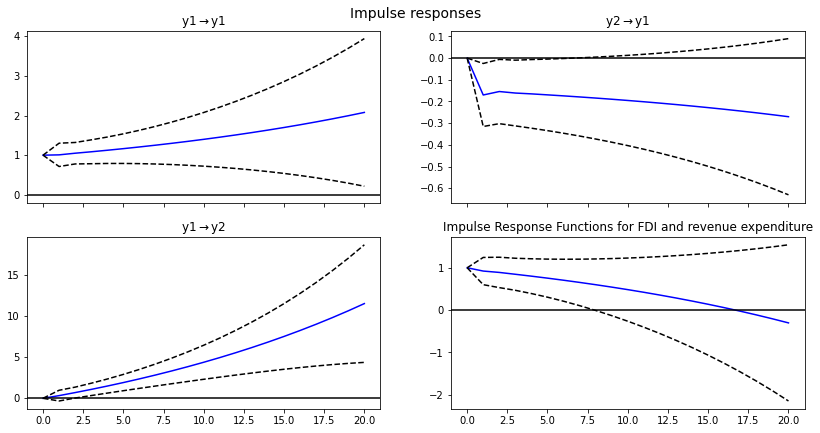

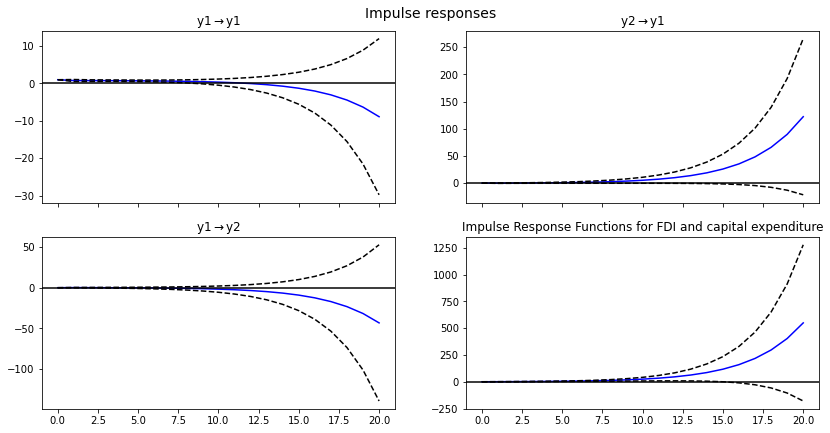

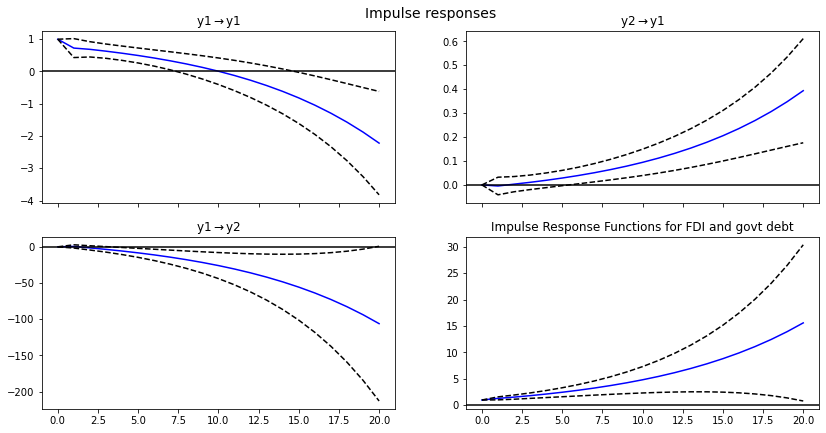

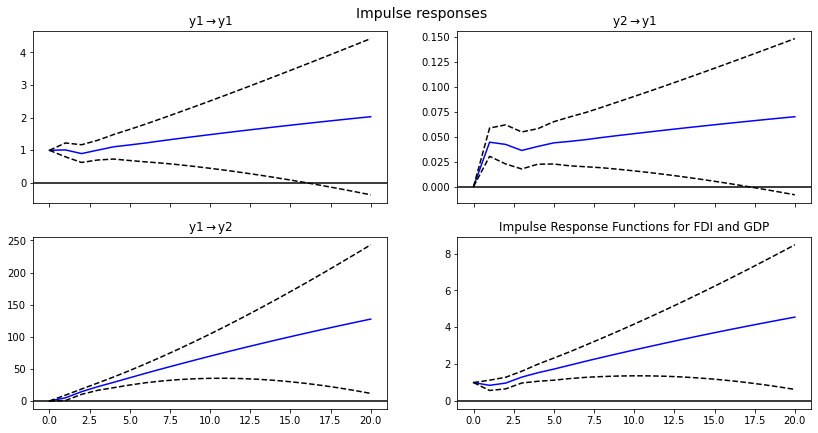

In [27]:
# Find the impulse responses for the following variables
options = ["revenue expenditure", "capital expenditure", "govt debt", "GDP"]

for y2_name in options:
    y1 = df["FDI"]
    y2 = df[y2_name]

    # Create a multivariate time series object
    y = np.array([y1, y2]).T

    # Estimate the VECM with two cointegrating variables
    vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=1, deterministic="ci")
    results = vecm_model.fit()

    # Plot the impulse response functions
    irf = results.irf(periods=20)
    irf.plot(figsize=(12, 6))
    plt.title(f"Impulse Response Functions for FDI and {y2_name}")
    plt.show()
    print("")  # empty line for readability
    print("")  # empty line for readability
    print("")  # empty line for readability

#### Johansen test

In [28]:
# Select the variables for the Johansen test
y1 = data["FDI"]
y2 = data["govt debt"]
y3 = data["GDP"]

# Create a multivariate time series object
y = np.array([y1, y2, y3]).T

# Perform Johansen cointegration test
johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

# Print the Johansen test results
print("Johansen Test Results:")
print("Eigenvalues:", johansen_test.eig)
print("Trace statistic:", johansen_test.lr1)
print("Critical values (trace):", johansen_test.cvt)
print("Max eigenvalue statistic:", johansen_test.lr2)
print("Critical values (max eigenvalue):", johansen_test.cvm)


Johansen Test Results:
Eigenvalues: [0.51229092 0.28927544 0.08636293]
Trace statistic: [59.79107528 22.45319344  4.69673675]
Critical values (trace): [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Max eigenvalue statistic: [37.33788185 17.75645668  4.69673675]
Critical values (max eigenvalue): [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [29]:
#VECM Estimation

# Determine the maximum number of lags to consider
maxlags = 3

# Use the select_order function to find the optimal number of lags
order_selector = select_order(y, maxlags=maxlags, deterministic="ci")

# Extract the optimal lag length based on AIC
optimal_lag = order_selector.aic
print("Optimal lag length based on AIC:", optimal_lag)


Optimal lag length based on AIC: 3


In [30]:
# Perform Johansen cointegration test
johansen_test = coint_johansen(y, det_order=0, k_ar_diff=1)

# Extract test results
trace_stat = johansen_test.lr1
critical_values_trace = johansen_test.cvt[:, 1]  # Critical values for 5% significance level

# Determine the cointegration rank
coint_rank = np.sum(trace_stat > critical_values_trace)

print("Cointegration Rank:", coint_rank)


Cointegration Rank: 3


In [31]:
# Select the three variables of interest
y = df[['FDI', 'govt debt', 'GDP']]

# Estimate the VECM with three cointegrating variables
vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=3, deterministic="ci")
results = vecm_model.fit()

# Print the summary of the VECM estimation
print(results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation FDI
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.FDI           0.3963      0.128      3.105      0.002       0.146       0.647
L1.govt debt    -0.0507      0.024     -2.143      0.032      -0.097      -0.004
L1.GDP           0.0449      0.009      4.810      0.000       0.027       0.063
Det. terms outside the coint. relation & lagged endog. parameters for equation govt debt
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.FDI          -0.7470      1.131     -0.660      0.509      -2.964       1.470
L1.govt debt     0.1530      0.210      0.729      0.466      -0.258       0.564
L1.GDP          -0.1855      0.083     -2.240      0.025      -0.348      -0.023
Det. terms outside

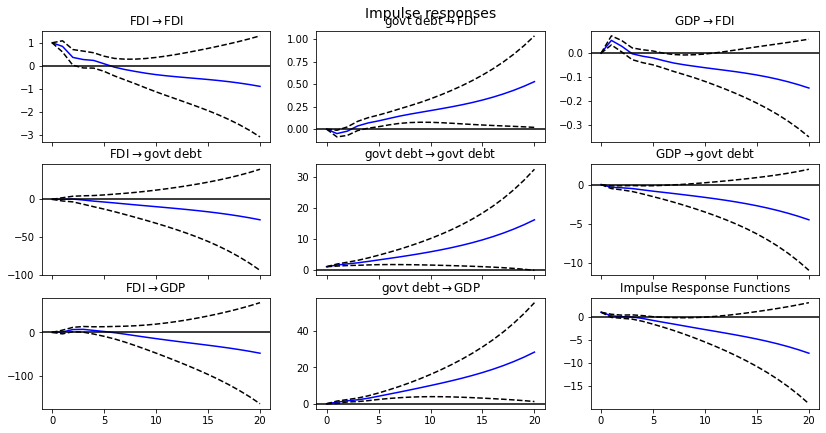

In [32]:
# Select the three variables of interest
y = df[['FDI', 'govt debt', 'GDP']]

# Estimate the VECM with three cointegrating variables
vecm_model = VECM(endog=y, k_ar_diff=1, coint_rank=3, deterministic="ci")
results = vecm_model.fit()

# Plot the impulse response functions
irf = results.irf(periods=20)
irf.plot(figsize=(12, 6))
plt.title("Impulse Response Functions")
plt.show()

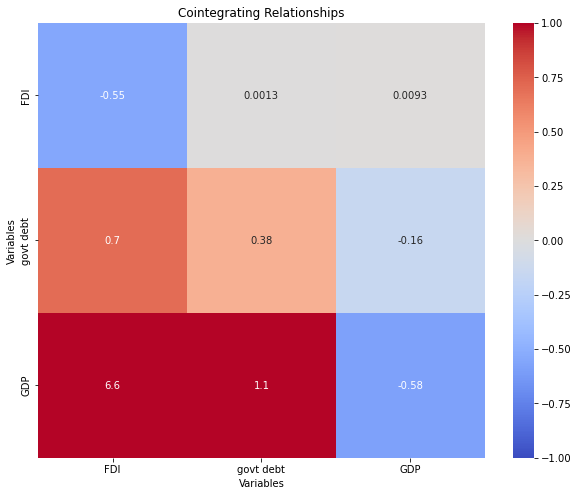

In [33]:
# Extract the alpha and beta matrices
alpha = results.alpha
beta = results.beta

# Compute the cointegrating relationships
coint_rel = np.dot(alpha, beta)

# Create a DataFrame for the cointegrating relationships
coint_rel_df = pd.DataFrame(coint_rel, columns=y.columns, index=y.columns)

# Plot the cointegrating relationships as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coint_rel_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Cointegrating Relationships")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

## Granger Casuality test

In [34]:
#Import required libraries
from statsmodels.tsa.stattools import grangercausalitytests

In [35]:
# Set the 'year' column as the index
df.set_index('year', inplace=True)

In [36]:
# Define the variables of interest
vars_of_interest = [
    ['FDI', 'capital expenditure'],
    ['FDI', 'revenue expenditure'],
    ['govt debt', 'FDI'],
    ['capital expenditure', 'FDI'],
    ['revenue expenditure', 'FDI'],
    ['capital expenditure', 'FDI'] , ['FDI', 'GDP'], ['GDP','FDI',] ]

In [37]:
# Create a function to perform Granger causality tests
def perform_granger_causality_tests_differenced(df, vars):
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    gc_res = grangercausalitytests(df_differenced, 2)
    return gc_res
def perform_granger_causality_tests(df, vars):
    df_subset = df[vars]
    gc_res = grangercausalitytests(df_subset, 2)
    return gc_res


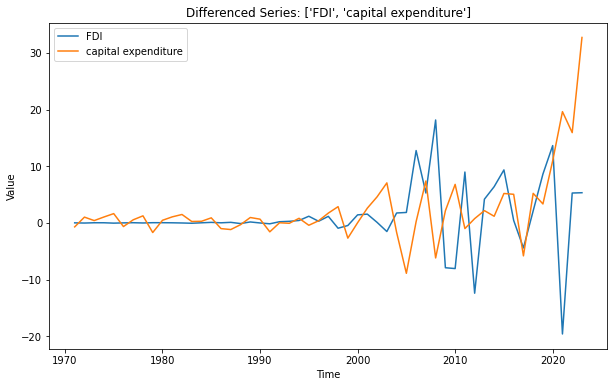

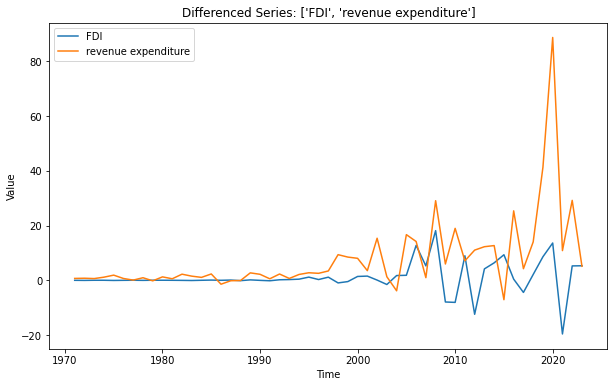

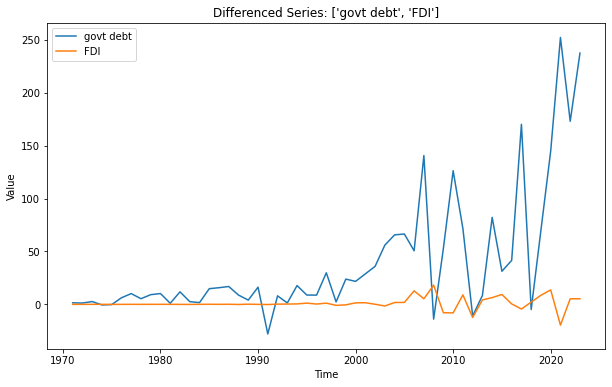

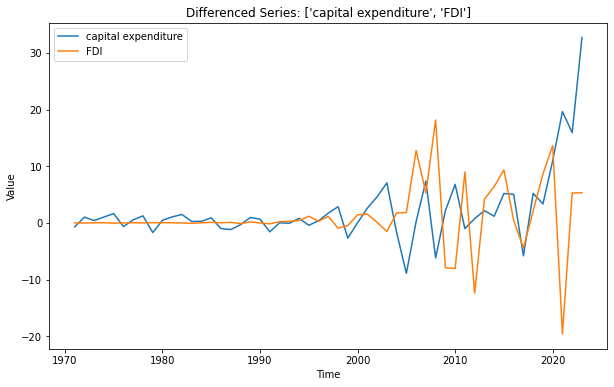

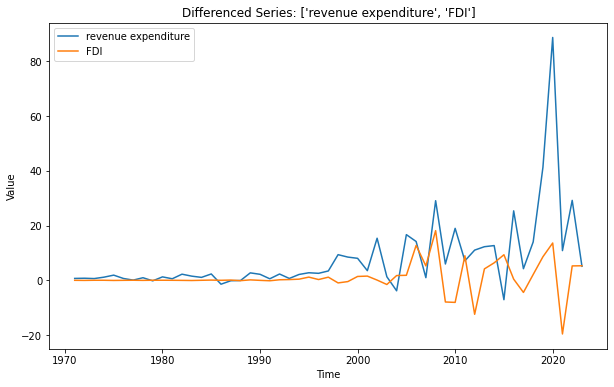

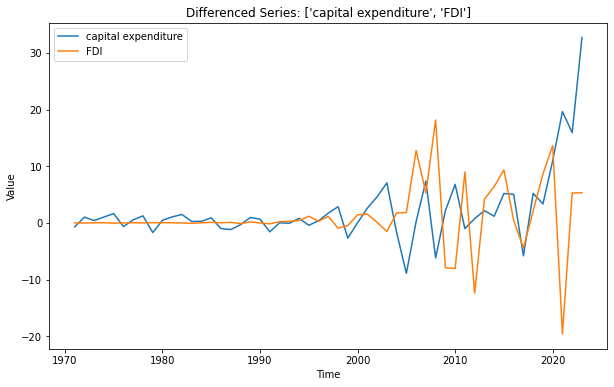

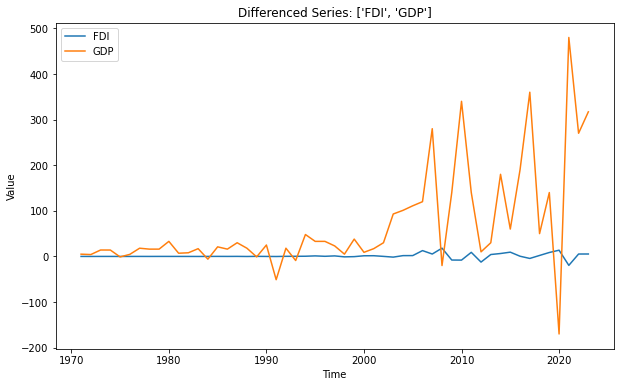

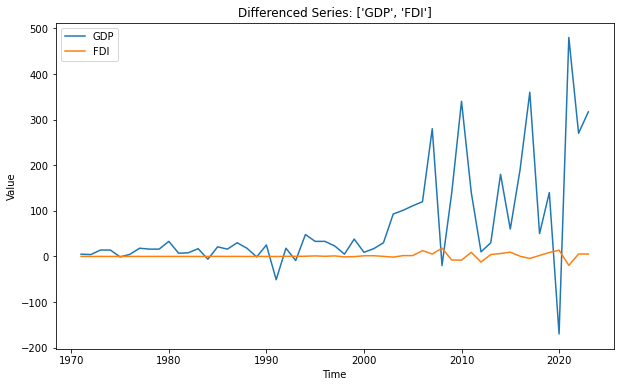

In [38]:
# Plot the differenced series for each set of variables
for vars in vars_of_interest:
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(df_differenced)
    plt.title(f"Differenced Series: {vars}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(vars)
    plt.show()

In [39]:
results_table = []  # Initialize the results table here
for vars in vars_of_interest:
    gc_res = perform_granger_causality_tests(df, vars)
    for lag, res in gc_res.items():
        p_value = res[0]['ssr_ftest'][1]
        if p_value < 0.05:
            granger_causality = 'Yes'
        else:
            granger_causality = 'No'
        results_table.append({
            'Variables': ' -> '.join(vars),
            'Lag': lag,
            'p-value': p_value,
            'Granger Causality': granger_causality
        })

df_results = pd.DataFrame(results_table)
df_results = df_results.drop_duplicates().reset_index(drop=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1126  , p=0.0838  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=3.2994  , p=0.0693  , df=1
likelihood ratio test: chi2=3.2008  , p=0.0736  , df=1
parameter F test:         F=3.1126  , p=0.0838  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3633  , p=0.2657  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=3.0166  , p=0.2213  , df=2
likelihood ratio test: chi2=2.9324  , p=0.2308  , df=2
parameter F test:         F=1.3633  , p=0.2657  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6469  , p=0.0359  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=4.9258  , p=0.0265  , df=1
likelihood ratio test: chi2=4.7101  , p=0.0300  , df=1
parameter F test:         F=4.6469  , p=0.0359  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8152  , p=0.0055  , df_d

#### Granger Causality Test Results

In [40]:
df_results

,Variables,Lag,p-value,Granger Causality
0,FDI -> capital expenditure,1,8.379591e-02,No
1,FDI -> capital expenditure,2,2.657459e-01,No
2,FDI -> revenue expenditure,1,3.594660e-02,Yes
3,FDI -> revenue expenditure,2,5.538690e-03,Yes
4,govt debt -> FDI,1,5.701604e-01,No
5,govt debt -> FDI,2,5.177765e-01,No
6,capital expenditure -> FDI,1,5.496865e-01,No
7,capital expenditure -> FDI,2,2.024381e-01,No
8,revenue expenditure -> FDI,1,1.464636e-01,No
9,revenue expenditure -> FDI,2,3.019381e-01,No


In [41]:
results_table2 = []  # Initialize the results table here
for vars in vars_of_interest:
    gc_res = perform_granger_causality_tests_differenced(df, vars)
    for lag, res in gc_res.items():
        p_value = res[0]['ssr_ftest'][1]
        if p_value < 0.05:
            granger_causality = 'Yes'
        else:
            granger_causality = 'No'
        results_table2.append({
            'Variables': ' -> '.join(vars),
            'Lag': lag,
            'p-value': p_value,
            'Granger Causality': granger_causality
        })

df_results2 = pd.DataFrame(results_table2)
df_results2 = df_results2.drop_duplicates().reset_index(drop=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0486  , p=0.8264  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.0516  , p=0.8203  , df=1
likelihood ratio test: chi2=0.0516  , p=0.8204  , df=1
parameter F test:         F=0.0486  , p=0.8264  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4682  , p=0.6291  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=1.0383  , p=0.5950  , df=2
likelihood ratio test: chi2=1.0278  , p=0.5981  , df=2
parameter F test:         F=0.4682  , p=0.6291  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7742  , p=0.1890  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=1.8828  , p=0.1700  , df=1
likelihood ratio test: chi2=1.8495  , p=0.1738  , df=1
parameter F test:         F=1.7742  , p=0.1890  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6642  , p=0.5196  , df_d

#### Granger Causality test results after Differencing

In [42]:
df_results2 

,Variables,Lag,p-value,Granger Causality
0,FDI -> capital expenditure,1,0.826409,No
1,FDI -> capital expenditure,2,0.629053,No
2,FDI -> revenue expenditure,1,0.189024,No
3,FDI -> revenue expenditure,2,0.519563,No
4,govt debt -> FDI,1,0.032136,Yes
5,govt debt -> FDI,2,0.176278,No
6,capital expenditure -> FDI,1,0.030487,Yes
7,capital expenditure -> FDI,2,0.128200,No
8,revenue expenditure -> FDI,1,0.702622,No
9,revenue expenditure -> FDI,2,0.726427,No


## Conclusion

Short Run: A positive shock to government debt (i.e., an increase in government debt) has a negative effect on FDI. This means that if government debt suddenly increases, it will likely lead to a decrease in foreign investment in the short term.

Long Run: The negative effect of government debt on FDI fades away over time. This means that as time passes, the initial negative impact of government debt on FDI will decrease and eventually disappear.

In conclusion, an increase in government debt initially discourages foreign investment, but this negative impact diminishes over time, eventually stabilizing and allowing foreign investment to recover.